In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        df = pd.read_csv("/kaggle/input/full-filled-brain-stroke-dataset/full_data.csv")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/full-filled-brain-stroke-dataset/full_data.csv
/kaggle/input/full-filled-brain-stroke-dataset/full_filled_stroke_data (1).csv


In [3]:
df

gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1       Male  80.0             0              1          Yes        Private   
2     Female  49.0             0              0          Yes        Private   
3     Female  79.0             1              0          Yes  Self-employed   
4       Male  81.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
4976    Male  41.0             0              0           No        Private   
4977    Male  40.0             0              0          Yes        Private   
4978  Female  45.0             1              0          Yes       Govt_job   
4979    Male  40.0             0              0          Yes        Private   
4980  Female  80.0             1              0          Yes        Private   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0             Urban             228.69  36.6  formerly smoked       1  
1             Rural             105.92  32.5     never smoked       1  
2             Urban             171.23  34.4           smokes       1  
3             Rural             174.12  24.0     never smoked       1  
4             Urban             186.21  29.0  formerly smoked       1  
...             ...                ...   ...              ...     ...  
4976          Rural              70.15  29.8  formerly smoked       0  
4977          Urban             191.15  31.1           smokes       0  
4978          Rural              95.02  31.8           smokes       0  
4979          Rural              83.94  30.0           smokes       0  
4980          Urban              83.75  29.1     never smoked       0  

[4981 rows x 11 columns]

In [4]:
df = df.sample(frac=1).reset_index()

In [5]:
df

index  gender    age  hypertension  heart_disease ever_married  \
0      2475  Female  63.00             0              0          Yes   
1      2423  Female  46.00             0              0          Yes   
2      3708  Female  51.00             0              0          Yes   
3      1218  Female  77.00             1              0          Yes   
4      4946    Male   1.80             0              0           No   
...     ...     ...    ...           ...            ...          ...   
4976   2562    Male  43.00             0              0          Yes   
4977   4515  Female   1.32             0              0           No   
4978    281  Female  57.00             1              0          Yes   
4979   4249  Female  42.00             0              0          Yes   
4980    454  Female  51.00             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Rural             153.60  28.0  formerly smoked   
1          Govt_job          Urban              56.89  23.8           smokes   
2          Govt_job          Urban              90.67  37.8          Unknown   
3     Self-employed          Urban              71.70  32.8     never smoked   
4          children          Urban              68.80  18.7          Unknown   
...             ...            ...                ...   ...              ...   
4976        Private          Urban              87.82  38.8  formerly smoked   
4977       children          Rural              75.22  18.6          Unknown   
4978        Private          Rural             235.85  40.1     never smoked   
4979        Private          Urban              86.30  20.1     never smoked   
4980        Private          Rural              82.93  29.7           smokes   

      stroke  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
4976       0  
4977       0  
4978       0  
4979       0  
4980       0  

[4981 rows x 12 columns]

In [6]:
del df["index"]

In [7]:
df.describe(include="all")

gender          age  hypertension  heart_disease ever_married  \
count     4981  4981.000000   4981.000000    4981.000000         4981   
unique       2          NaN           NaN            NaN            2   
top     Female          NaN           NaN            NaN          Yes   
freq      2907          NaN           NaN            NaN         3280   
mean       NaN    43.419859      0.096165       0.055210          NaN   
std        NaN    22.662755      0.294848       0.228412          NaN   
min        NaN     0.080000      0.000000       0.000000          NaN   
25%        NaN    25.000000      0.000000       0.000000          NaN   
50%        NaN    45.000000      0.000000       0.000000          NaN   
75%        NaN    61.000000      0.000000       0.000000          NaN   
max        NaN    82.000000      1.000000       1.000000          NaN   

       work_type Residence_type  avg_glucose_level          bmi  \
count       4981           4981        4981.000000  4981.000000   
unique         4              2                NaN          NaN   
top      Private          Urban                NaN          NaN   
freq        2860           2532                NaN          NaN   
mean         NaN            NaN         105.943562    28.498173   
std          NaN            NaN          45.075373     6.790464   
min          NaN            NaN          55.120000    14.000000   
25%          NaN            NaN          77.230000    23.700000   
50%          NaN            NaN          91.850000    28.100000   
75%          NaN            NaN         113.860000    32.600000   
max          NaN            NaN         271.740000    48.900000   

       smoking_status       stroke  
count            4981  4981.000000  
unique              4          NaN  
top      never smoked          NaN  
freq             1838          NaN  
mean              NaN     0.049789  
std               NaN     0.217531  
min               NaN     0.000000  
25%               NaN     0.000000  
50%               NaN     0.000000  
75%               NaN     0.000000  
max               NaN     1.000000

In [8]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
for i in df.columns:
    print(i," : ", df[i].dtypes)

gender  :  object
age  :  float64
hypertension  :  int64
heart_disease  :  int64
ever_married  :  object
work_type  :  object
Residence_type  :  object
avg_glucose_level  :  float64
bmi  :  float64
smoking_status  :  object
stroke  :  int64


In [10]:
for i in df.columns:
    if df[i].dtypes =="object":
        print(df[i], " : ", df[i].value_counts())

0       Female
1       Female
2       Female
3       Female
4         Male
         ...  
4976      Male
4977    Female
4978    Female
4979    Female
4980    Female
Name: gender, Length: 4981, dtype: object  :  Female    2907
Male      2074
Name: gender, dtype: int64
0       Yes
1       Yes
2       Yes
3       Yes
4        No
       ... 
4976    Yes
4977     No
4978    Yes
4979    Yes
4980    Yes
Name: ever_married, Length: 4981, dtype: object  :  Yes    3280
No     1701
Name: ever_married, dtype: int64
0             Private
1            Govt_job
2            Govt_job
3       Self-employed
4            children
            ...      
4976          Private
4977         children
4978          Private
4979          Private
4980          Private
Name: work_type, Length: 4981, dtype: object  :  Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64
0       Rural
1       Urban
2       Urban
3       Urban
4       Urban
        ... 

In [11]:
df["smoking_status"]=df["smoking_status"].replace('Unknown', np.nan)

In [12]:
df.isna().sum()

gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                     0
smoking_status       1500
stroke                  0
dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
df.shape

(3481, 11)

In [15]:
x = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [16]:
import seaborn as sns
import plotly.express as px

<AxesSubplot:>

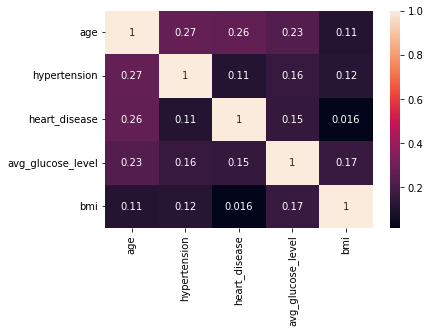

In [17]:
sns.heatmap(x.corr(), annot=True)

In [18]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
label = LabelEncoder()
for i in x.columns:
    if x[i].dtypes =="object":
        x[i] = label.fit_transform(x[i])
x

gender   age  hypertension  heart_disease  ever_married  work_type  \
0          0  63.0             0              0             1          1   
1          0  46.0             0              0             1          0   
3          0  77.0             1              0             1          2   
5          0  62.0             1              0             0          1   
6          0  30.0             0              0             1          1   
...      ...   ...           ...            ...           ...        ...   
4974       1  80.0             1              1             1          1   
4976       1  43.0             0              0             1          1   
4978       0  57.0             1              0             1          1   
4979       0  42.0             0              0             1          1   
4980       0  51.0             0              0             1          1   

      Residence_type  avg_glucose_level   bmi  smoking_status  
0                  0             153.60  28.0               0  
1                  1              56.89  23.8               2  
3                  1              71.70  32.8               1  
5                  0              77.04  33.8               0  
6                  1              84.92  47.8               1  
...              ...                ...   ...             ...  
4974               1              86.68  27.7               0  
4976               1              87.82  38.8               0  
4978               0             235.85  40.1               1  
4979               1              86.30  20.1               1  
4980               0              82.93  29.7               2  

[3481 rows x 10 columns]

In [19]:
def multicol(x):
    arr = StandardScaler().fit_transform(x)
    return pd.DataFrame([[x.columns[i], variance_inflation_factor(arr, i)] for i in range(arr.shape[1])], columns=["Features", "VIF"])

In [20]:
multicol(x)

Features       VIF
0             gender  1.014941
1                age  1.624806
2       hypertension  1.102395
3      heart_disease  1.102502
4       ever_married  1.417979
5          work_type  1.019331
6     Residence_type  1.001349
7  avg_glucose_level  1.101579
8                bmi  1.070520
9     smoking_status  1.027728

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [24]:
x_test.shape

(871, 10)

Lets build a model for Logistic Regression first

In [25]:
scale = StandardScaler()
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)

In [26]:
lr  = LogisticRegression()
lr.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [27]:
print("Accuracy for Training Data : ", lr.score(x_train, y_train))
print("Accuracy for Test Data : ", lr.score(x_test, y_test))

Accuracy for Training Data :  0.9425287356321839
Accuracy for Test Data :  0.9414466130884042


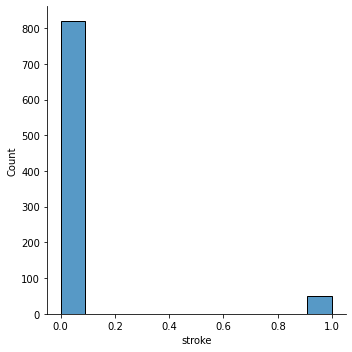

In [28]:
sns.displot(y_test-lr.predict(x_test))

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, lr.predict(x_test))

array([[820,   0],
       [ 51,   0]])

In [30]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
print("Accuracy for Training Data : ", dt.score(x_train, y_train))
print("Accuracy for Test Data : ", dt.score(x_test, y_test))

Accuracy for Training Data :  1.0
Accuracy for Test Data :  0.8874856486796785


[Text(0.45230602763659467, 0.9772727272727273, 'X[1] <= 67.5\ngini = 0.108\nsamples = 2610\nvalue = [2460, 150]'),
 Text(0.1557867429055485, 0.9318181818181818, 'X[1] <= 47.5\ngini = 0.052\nsamples = 2087\nvalue = [2031, 56]'),
 Text(0.030495552731893267, 0.8863636363636364, 'X[7] <= 58.115\ngini = 0.008\nsamples = 1193\nvalue = [1188, 5]'),
 Text(0.013553578991952562, 0.8409090909090909, 'X[7] <= 57.96\ngini = 0.069\nsamples = 28\nvalue = [27, 1]'),
 Text(0.006776789495976281, 0.7954545454545454, 'gini = 0.0\nsamples = 27\nvalue = [27, 0]'),
 Text(0.020330368487928845, 0.7954545454545454, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.04743752647183397, 0.8409090909090909, 'X[5] <= 1.5\ngini = 0.007\nsamples = 1165\nvalue = [1161, 4]'),
 Text(0.0338839474798814, 0.7954545454545454, 'X[7] <= 76.16\ngini = 0.004\nsamples = 1024\nvalue = [1022, 2]'),
 Text(0.027107157983905124, 0.75, 'X[7] <= 76.105\ngini = 0.016\nsamples = 254\nvalue = [252, 2]'),
 Text(0.020330368487928845, 0.7045

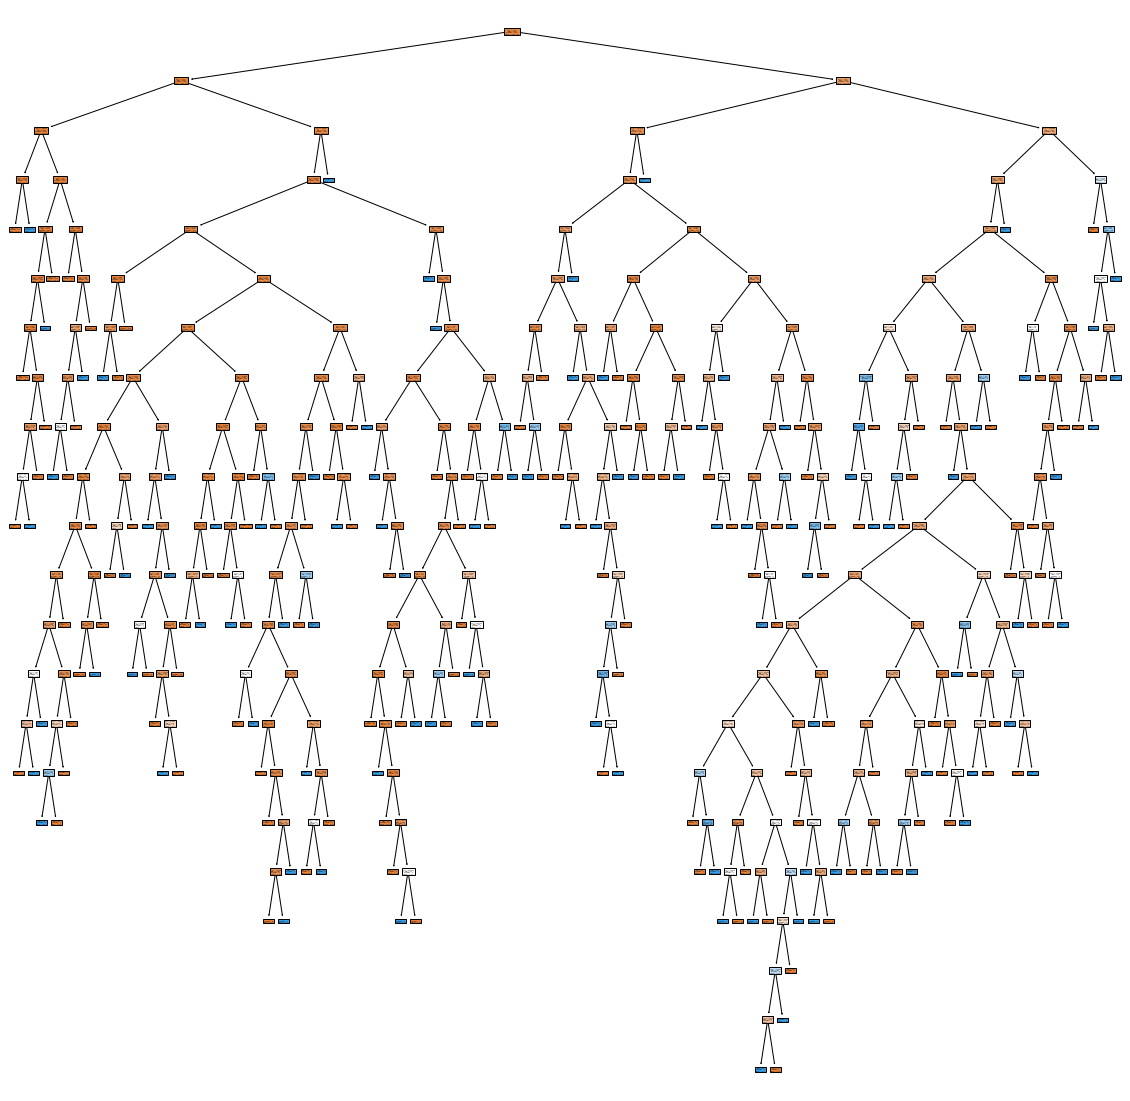

In [31]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
tree.plot_tree(dt, filled=True)

Since we cannot see anything clearly so we will consider sample x and y.

In [32]:
sample_df = df.head(50)
sample_df

gender   age  hypertension  heart_disease ever_married      work_type  \
0   Female  63.0             0              0          Yes        Private   
1   Female  46.0             0              0          Yes       Govt_job   
3   Female  77.0             1              0          Yes  Self-employed   
5   Female  62.0             1              0           No        Private   
6   Female  30.0             0              0          Yes        Private   
7   Female  59.0             0              0          Yes        Private   
9   Female  81.0             0              1          Yes        Private   
10  Female  42.0             0              0          Yes  Self-employed   
12  Female  61.0             0              0          Yes        Private   
13  Female  57.0             0              0          Yes        Private   
16  Female  38.0             0              0          Yes        Private   
18    Male  59.0             0              0          Yes  Self-employed   
19  Female  32.0             0              0          Yes        Private   
20  Female  54.0             0              0          Yes        Private   
21  Female  78.0             0              1          Yes        Private   
22  Female  41.0             0              0          Yes        Private   
23  Female  31.0             0              0          Yes        Private   
24    Male  66.0             0              0          Yes       Govt_job   
26  Female  30.0             0              0          Yes        Private   
27  Female  55.0             0              0           No        Private   
28  Female  47.0             0              0          Yes        Private   
29    Male  78.0             0              0          Yes        Private   
31  Female  45.0             0              0          Yes       Govt_job   
32    Male  60.0             0              0          Yes        Private   
33  Female  26.0             0              0           No        Private   
34    Male  28.0             0              0           No       Govt_job   
36  Female  37.0             0              0          Yes        Private   
37  Female  66.0             0              0          Yes       Govt_job   
38  Female  40.0             0              0          Yes        Private   
39  Female  57.0             0              0          Yes       Govt_job   
40  Female  14.0             0              0           No       children   
42  Female  42.0             0              0          Yes       Govt_job   
43    Male  52.0             0              0          Yes        Private   
44  Female  13.0             0              0           No       children   
45  Female  37.0             0              0          Yes        Private   
46    Male  27.0             0              0           No  Self-employed   
47  Female  42.0             0              0           No        Private   
48  Female  71.0             0              1          Yes        Private   
49    Male  33.0             0              0          Yes  Self-employed   
51  Female  54.0             0              0          Yes        Private   
53  Female  78.0             1              1          Yes        Private   
54  Female  54.0             0              0          Yes        Private   
55    Male  70.0             1              0          Yes        Private   
56  Female  20.0             0              0           No        Private   
62  Female  79.0             1              1          Yes       Govt_job   
63    Male  34.0             0              0          Yes        Private   
65    Male  79.0             0              0          Yes  Self-employed   
66  Female  63.0             1              0          Yes        Private   
67  Female  59.0             0              0          Yes        Private   
68    Male  26.0             0              0           No        Private   

   Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0     

In [33]:
sample_x = sample_df.iloc[:, :-1]
sample_y = sample_df.iloc[:,-1]

In [34]:
label = LabelEncoder()
for i in sample_x.columns:
    if sample_x[i].dtypes =="object":
        sample_x[i] = label.fit_transform(sample_x[i])

In [35]:
sample_model = DecisionTreeClassifier()
sample_model.fit(sample_x, sample_y)

DecisionTreeClassifier()

[Text(0.4, 0.875, 'X[8] <= 35.25\ngini = 0.077\nsamples = 50\nvalue = [48, 2]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 39\nvalue = [39, 0]'),
 Text(0.6, 0.625, 'X[8] <= 37.95\ngini = 0.298\nsamples = 11\nvalue = [9, 2]'),
 Text(0.4, 0.375, 'X[9] <= 1.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]')]

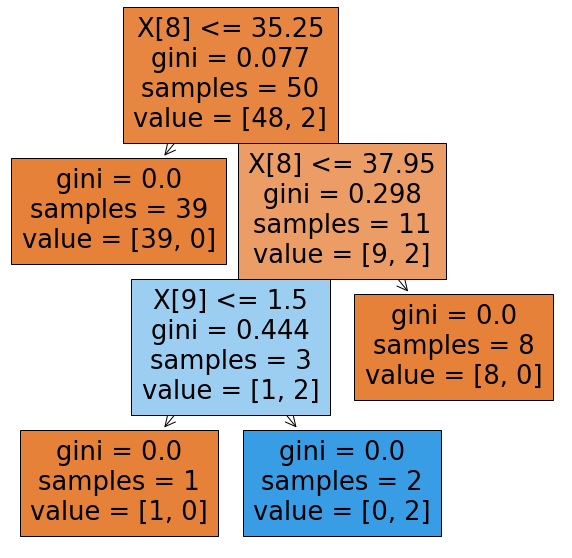

In [36]:
plt.figure(figsize=(10,10))
tree.plot_tree(sample_model, filled=True)

In [37]:
path = dt.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas = path.ccp_alphas

Text(0, 0.5, 'score')

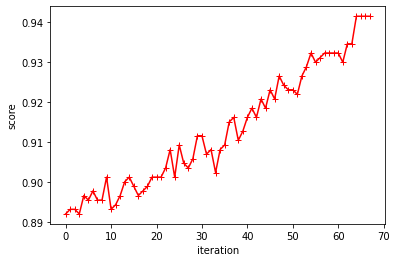

In [38]:
dt_ccp_alpha = []
score = []
for ccp in ccp_alphas:
    dt_m = DecisionTreeClassifier(ccp_alpha=ccp)
    dt_m.fit(x_train, y_train)
    dt_ccp_alpha.append(dt_m)
    score.append(dt_m.score(x_test, y_test))
    
plt.plot(score, "r-+")
plt.xlabel("iteration")
plt.ylabel("score")

In [39]:
print("Maximum score for test set : ",max(score))

Maximum score for test set :  0.9414466130884042


lets try to perform some hyperparameter tuning!

In [51]:
param_grid = {
    "criterion" : ['gini', 'entropy'],
    "splitter" : ['best', 'random'],
    "ccp_alpha": np.random.rand(60)
}

In [52]:
grid_cv = GridSearchCV(dt, param_grid=param_grid, verbose=1, cv=5)
grid_cv.fit(x_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.77148355, 0.69819822, 0.30720035, 0.93827704, 0.34643687,
       0.60439358, 0.13497056, 0.09090279, 0.59440786, 0.62835932,
       0.8239603 , 0.20780211, 0.13691382, 0.94555897, 0.87319105,
       0.18187081, 0.67532487, 0.25957752, 0.23937612, 0.91937602,
       0.16184881, 0.44522858, 0.32007999, 0.70475184, 0.9...
       0.67253006, 0.57267964, 0.40228765, 0.55215257, 0.80510026,
       0.60212583, 0.15664752, 0.20839843, 0.17512054, 0.47394245,
       0.1314059 , 0.52209869, 0.67088283, 0.8461918 , 0.83710286,
       0.75187459, 0.23077704, 0.94774919, 0.3532551 , 0.13869439,
       0.32932211, 0.1749135 , 0.26052788, 0.85421389, 0.93074695,
       0.87410943, 0.74950042, 0.10728688, 0.49364397, 0.70739123]),
                         'criterion': ['gini', 'entropy'],
                         'splitter': ['best', 'random']},
             verbose=1)

In [53]:
dt = DecisionTreeClassifier(**grid_cv.best_params_)
dt.fit(x_train, y_train)
print("Accuracy for Training Data : ", dt.score(x_train, y_train))
print("Accuracy for Test Data : ", dt.score(x_test, y_test))

Accuracy for Training Data :  0.9425287356321839
Accuracy for Test Data :  0.9414466130884042


In [41]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
print("Score for Training data : ", rfc.score(x_train, y_train))
print("Score for Test data : ", rfc.score(x_test, y_test))

Score for Training data :  1.0
Score for Test data :  0.939150401836969


In [42]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
print("Score for Training data : ", xgb.score(x_train, y_train))
print("Score for Test data : ", xgb.score(x_test, y_test))

Score for Training data :  0.9996168582375479
Score for Test data :  0.9345579793340988


In [45]:
param_grid={
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(1,20,5),
    'max_features' : ['sqrt','log2']
}

In [46]:

grid_cv = GridSearchCV(rfc,param_grid=param_grid, verbose=1, cv=5)

In [47]:
grid_cv.fit(x_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20, 5),
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [90, 100, 115, 130]},
             verbose=1)

In [48]:
grid_cv.best_params_

{'criterion': 'gini',
 'max_depth': 16,
 'max_features': 'sqrt',
 'n_estimators': 115}

In [49]:
rfc = RandomForestClassifier(**grid_cv.best_params_)
rfc.fit(x_train, y_train)
print("Score for Training data : ", rfc.score(x_train, y_train))
print("Score for Test data : ", rfc.score(x_test, y_test))

Score for Training data :  0.9996168582375479
Score for Test data :  0.9402985074626866


We are getting max of 94.14% of accuracy using DecisionTreeClassifier

Lets see how many prediction are correct !

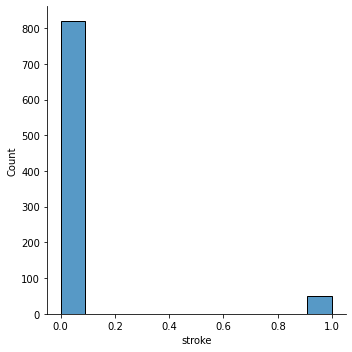

In [58]:
sns.displot(y_test-dt.predict(x_test))

Well thats pretty good as most of the predictions are accurate!

<AxesSubplot:>

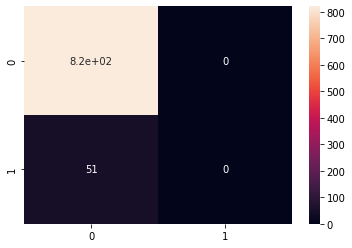

In [59]:
sns.heatmap(confusion_matrix(y_test,dt.predict(x_test) ), annot=True)